# Malignant or Benign
### Breast Cancer Classification using Logistic Regression
####  __[Using Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data)__

Cancer originating from the breast cells is referred to as breast cancer. The efforts made towards raising awareness of breast cancer and funding research have resulted in significant progress in the detection and treatment of the disease. As a result, breast cancer survival rates have risen and the number of fatalities has decreased. This can be attributed to factors such as early detection, personalized treatment methods, and a better understanding of the disease.

Doctors often use additional tests to find or diagnose breast cancer, such as examining a breast mass. The breast mass can be classified as benign (noncancerous) or malignant (cancerous). The dataset of breast mass characterization that includes features such as tumor size, shape, and texture is trained. Using Logistic Regression, we can predict whether the tumor is benign or malignant. The model is evaluated based on its accuracy in predicting malignant and benign tumors.

### Goal:
This notebook aims to:
* Exploratory Data Analysis
* Train logistic regression model using sci-kit learn

### 1. Importing Libraries

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression

### 2. Load the Data

In [2]:
df_train = pd.read_csv('bcancer.csv')
df_train.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# drop irrelevant columns 
df_train.drop(['id', 'Unnamed: 32'], axis = 1, inplace = True)

In [4]:
# replaces values in 'diagnosis' column with 0 and 1
df_train['diagnosis'] = df_train['diagnosis'].apply(lambda val: 1 if val == 'M' else 0)
df_train.head()
# 1: Malignant ; 0: Benign

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df_train.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [6]:
# check for null values
df_train.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

There are no nulls in the data, thus it is ready for analysis.

### 3. Exploratory Data Analysis

Analyzing Diagnosis Data

In [8]:
M = df_train[(df_train['diagnosis'] != 0)]
B = df_train[(df_train['diagnosis'] == 0)]

#### Drawing Comparisons

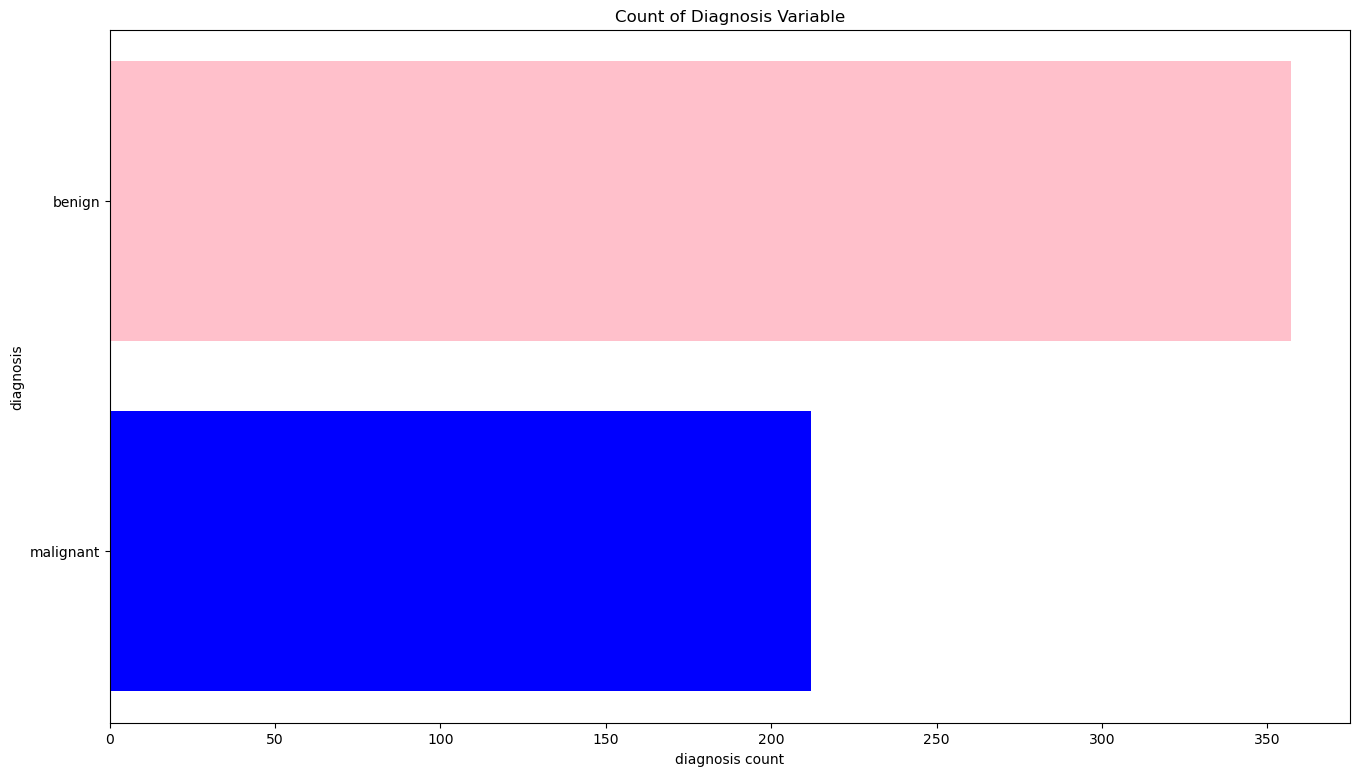

In [9]:
# drawing comparisons

y = ['malignant', 'benign']
x = [len(M), len(B)]

fig, ax = plt.subplots(figsize =(16, 9))
ax.barh(y, x, color = ['blue', 'pink'])

plt.xlabel("diagnosis count")
plt.ylabel("diagnosis")
plt.title('Count of Diagnosis Variable')

plt.show()

#### Feature Distribution

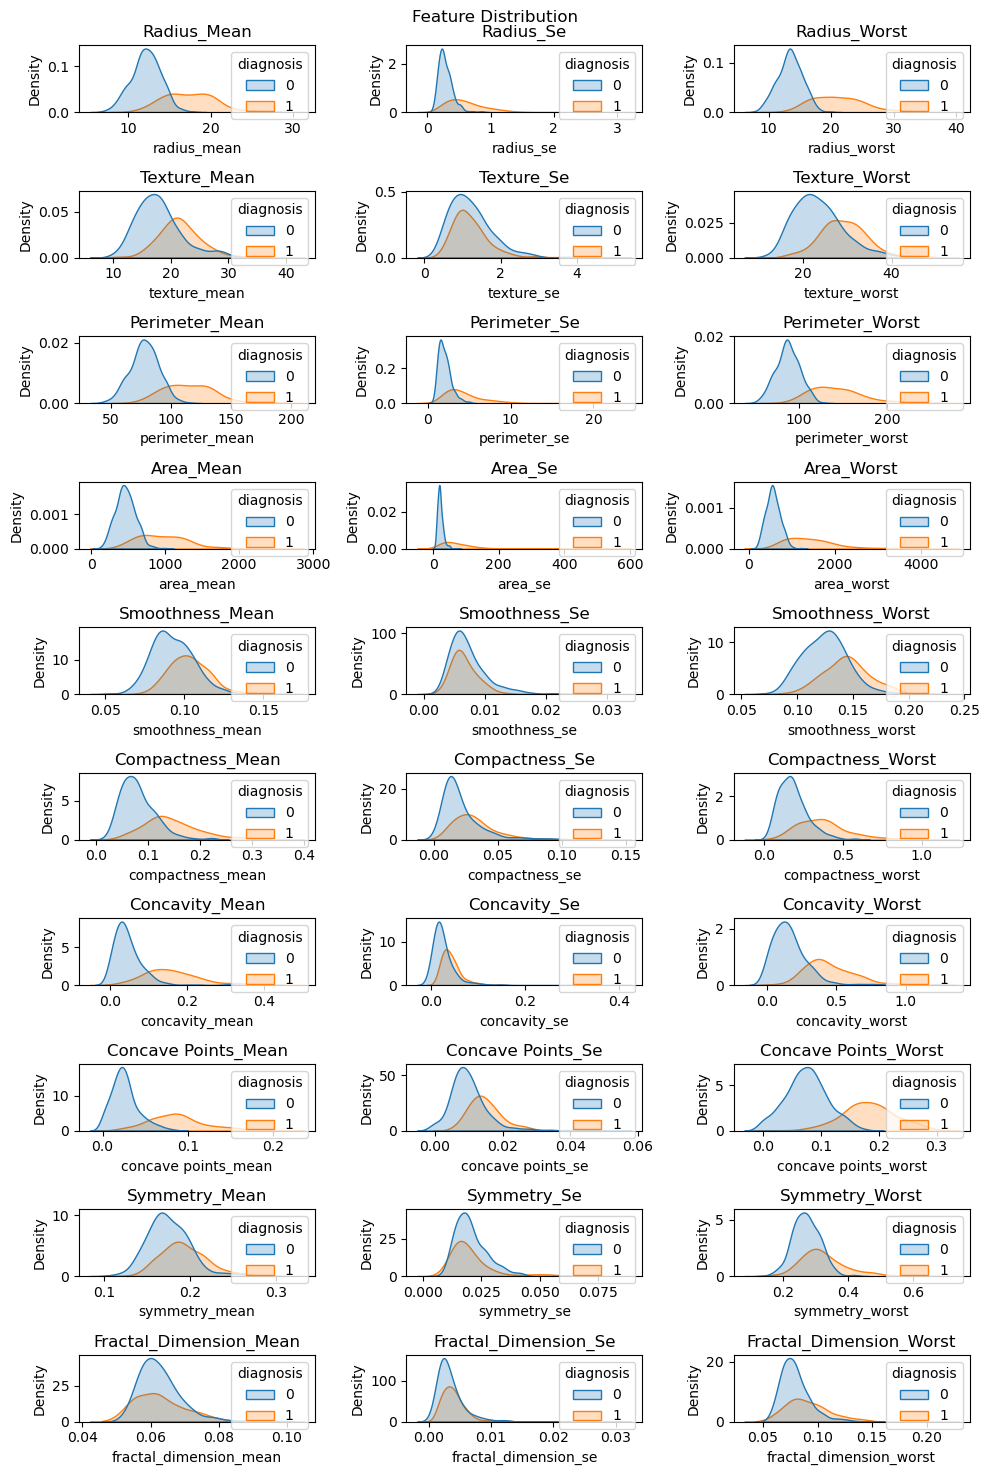

In [61]:
# show kernel density estimate for every feature

fig, axs = plt.subplots(10, 3, figsize=(10, 15))
fig.suptitle('Feature Distribution')

# for radius_mean
sns.kdeplot(data=df_train, x='radius_mean', hue='diagnosis', ax = axs[0,0], fill = True)
axs[0,0].set_title(df_train.columns[1].title())

# for radius_se
sns.kdeplot(data=df_train, x='radius_se', hue='diagnosis', ax = axs[0,1], fill = True)
axs[0,1].set_title(df_train.columns[11].title())

# for radius_worst
sns.kdeplot(data=df_train, x='radius_worst', hue='diagnosis', ax = axs[0,2], fill = True)
axs[0,2].set_title(df_train.columns[21].title())

# for texture_mean
sns.kdeplot(data=df_train, x='texture_mean', hue='diagnosis', ax = axs[1,0], fill = True)
axs[1,0].set_title(df_train.columns[2].title())

# for texture_se
sns.kdeplot(data=df_train, x='texture_se', hue='diagnosis', ax = axs[1,1], fill = True)
axs[1,1].set_title(df_train.columns[12].title())

# for texture_worst
sns.kdeplot(data=df_train, x='texture_worst', hue='diagnosis', ax = axs[1,2], fill = True)
axs[1,2].set_title(df_train.columns[22].title())

# for perimeter_mean
sns.kdeplot(data=df_train, x='perimeter_mean', hue='diagnosis', ax = axs[2,0], fill = True)
axs[2,0].set_title(df_train.columns[3].title())

# for perimeter_se
sns.kdeplot(data=df_train, x='perimeter_se', hue='diagnosis', ax = axs[2,1], fill = True)
axs[2,1].set_title(df_train.columns[13].title())

# for perimeter_worst
sns.kdeplot(data=df_train, x='perimeter_worst', hue='diagnosis', ax = axs[2,2], fill = True)
axs[2,2].set_title(df_train.columns[23].title())

# for area_mean
sns.kdeplot(data=df_train, x='area_mean', hue='diagnosis', ax = axs[3,0], fill = True)
axs[3,0].set_title(df_train.columns[4].title())

# for area_se
sns.kdeplot(data=df_train, x='area_se', hue='diagnosis', ax = axs[3,1], fill = True)
axs[3,1].set_title(df_train.columns[14].title())

# for area_worst
sns.kdeplot(data=df_train, x='area_worst', hue='diagnosis', ax = axs[3,2], fill = True)
axs[3,2].set_title(df_train.columns[24].title())

# for smoothness_mean
sns.kdeplot(data=df_train, x='smoothness_mean', hue='diagnosis', ax = axs[4,0], fill = True)
axs[4,0].set_title(df_train.columns[5].title())

# for smoothness_se
sns.kdeplot(data=df_train, x='smoothness_se', hue='diagnosis', ax = axs[4,1], fill = True)
axs[4,1].set_title(df_train.columns[15].title())

# for smoothness_worst
sns.kdeplot(data=df_train, x='smoothness_worst', hue='diagnosis', ax = axs[4,2], fill = True)
axs[4,2].set_title(df_train.columns[25].title())

# for compactness_mean
sns.kdeplot(data=df_train, x='compactness_mean', hue='diagnosis', ax = axs[5,0], fill = True)
axs[5,0].set_title(df_train.columns[6].title())

# for compactness_se
sns.kdeplot(data=df_train, x='compactness_se', hue='diagnosis', ax = axs[5,1], fill = True)
axs[5,1].set_title(df_train.columns[16].title())

# for compactness_worst
sns.kdeplot(data=df_train, x='compactness_worst', hue='diagnosis', ax = axs[5,2], fill = True)
axs[5,2].set_title(df_train.columns[26].title())

# for concavity_mean
sns.kdeplot(data=df_train, x='concavity_mean', hue='diagnosis', ax = axs[6,0], fill = True)
axs[6,0].set_title(df_train.columns[7].title())

# for concavity_se
sns.kdeplot(data=df_train, x='concavity_se', hue='diagnosis', ax = axs[6,1], fill = True)
axs[6,1].set_title(df_train.columns[17].title())

# for concavity_worst
sns.kdeplot(data=df_train, x='concavity_worst', hue='diagnosis', ax = axs[6,2], fill = True)
axs[6,2].set_title(df_train.columns[27].title())

# for concave points_mean
sns.kdeplot(data=df_train, x='concave points_mean', hue='diagnosis', ax = axs[7,0], fill = True)
axs[7,0].set_title(df_train.columns[8].title())

# for concave points_se
sns.kdeplot(data=df_train, x='concave points_se', hue='diagnosis', ax = axs[7,1], fill = True)
axs[7,1].set_title(df_train.columns[18].title())

# for concave points_worst
sns.kdeplot(data=df_train, x='concave points_worst', hue='diagnosis', ax = axs[7,2], fill = True)
axs[7,2].set_title(df_train.columns[28].title())

# for symmetry_mean
sns.kdeplot(data=df_train, x='symmetry_mean', hue='diagnosis', ax = axs[8,0], fill = True)
axs[8,0].set_title(df_train.columns[9].title())

# for symmetry_se
sns.kdeplot(data=df_train, x='symmetry_se', hue='diagnosis', ax = axs[8,1], fill = True)
axs[8,1].set_title(df_train.columns[19].title())

# for symmetry_worst
sns.kdeplot(data=df_train, x='symmetry_worst', hue='diagnosis', ax = axs[8,2], fill = True)
axs[8,2].set_title(df_train.columns[29].title())

# for fractal_dimension_mean
sns.kdeplot(data=df_train, x='fractal_dimension_mean', hue='diagnosis', ax = axs[9,0], fill = True)
axs[9,0].set_title(df_train.columns[10].title())

# for fractal_dimension_se
sns.kdeplot(data=df_train, x='fractal_dimension_se', hue='diagnosis', ax = axs[9,1], fill = True)
axs[9,1].set_title(df_train.columns[20].title())

# for fractal_dimension_worst
sns.kdeplot(data=df_train, x='fractal_dimension_worst', hue='diagnosis', ax = axs[9,2], fill = True)
axs[9,2].set_title(df_train.columns[30].title())


plt.tight_layout()
plt.show()

Diagnosis:
0 = Benign |
1 = Malignant

#### Correlation Matrix

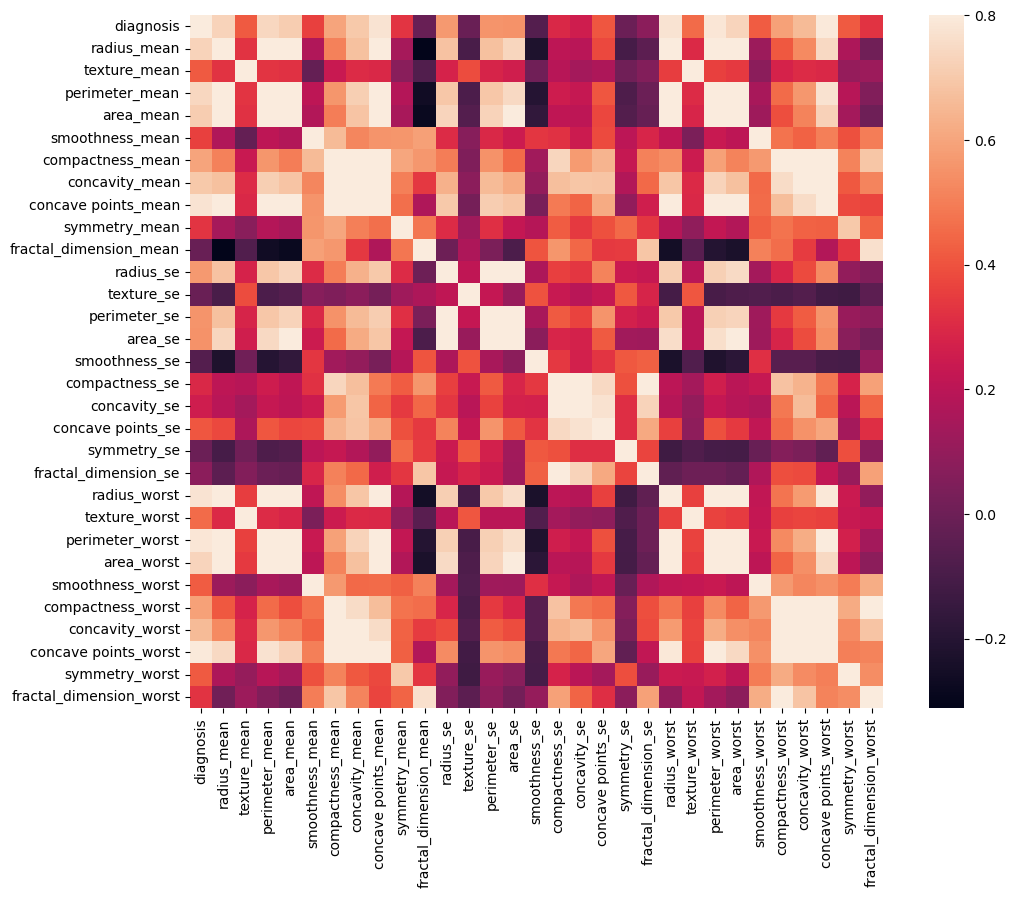

In [63]:
# heatmap
corrmat_train = df_train.corr()
f, ax = plt.subplots(figsize = (12,9))
sns.heatmap(corrmat_train, vmax = 0.8, square = True);
plt.show()

The lighter the shade, the more correlation it has with its counterpart. 

### 4. Prepare Dataset

#### Defining X, y
* X = features (radius_mean,..)
* y = target (diagnosis)

In [65]:
X = df_train.drop('diagnosis', axis = 1)
y = df_train['diagnosis']

#### Train Test Split

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)


#### Scaling Data

In [67]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 5. Logistic Regression Predictive Model

In [69]:
# fit the data to the model

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [71]:
# model prediction

y_pred = log_reg.predict(X_test)

In [72]:
# accuracy score

# accuracy score

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(accuracy_score(y_train, log_reg.predict(X_train)))

log_reg_acc = accuracy_score(y_test, log_reg.predict(X_test))
print(log_reg_acc)

0.9899497487437185
0.9766081871345029


In [75]:
# confusion matrix
print(confusion_matrix(y_test, y_pred))

# classification report
print(classification_report(y_test, y_pred))

[[107   1]
 [  3  60]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       108
           1       0.98      0.95      0.97        63

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



The Logistic Regression model has an accuracy score of 0.959064.